In [47]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt
import qutip as q

In [48]:
sep_data = th.load('../datasets/sep_states1.pt')

ent_data = th.load('../datasets/ent_states1.pt')

sep_data.shape

torch.Size([30000, 81])

In [49]:
data = sep_data.real.detach().numpy()[0:1000].flatten()
data

array([0.00030372, 0.00044198, 0.00079099, ..., 0.00451057, 0.00635544,
       0.00395287], dtype=float32)

(array([3.0000e+00, 2.0000e+01, 1.6810e+03, 1.6535e+04, 2.5270e+04,
        1.9117e+04, 1.0080e+04, 4.7880e+03, 2.0450e+03, 7.8800e+02,
        3.5300e+02, 1.5100e+02, 8.5000e+01, 3.6000e+01, 2.5000e+01,
        9.0000e+00, 7.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([-0.00375909, -0.00217731, -0.00059554,  0.00098623,  0.00256801,
         0.00414978,  0.00573155,  0.00731333,  0.0088951 ,  0.01047688,
         0.01205865,  0.01364042,  0.0152222 ,  0.01680397,  0.01838575,
         0.01996752,  0.02154929,  0.02313107,  0.02471284,  0.02629462,
         0.02787639]),
 <BarContainer object of 20 artists>)

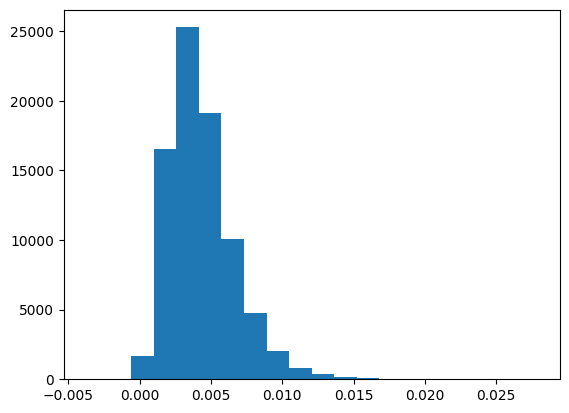

In [50]:
plt.hist(data, bins=20, label='sep')

In [51]:
# Test separability

def peres_horodecki_bipartite(rho, mask=[0,1]):
    """ Tests the given bipartite state for Peres-Horodecki criterion
    
    Parameters
    ----------
    rho: qobj/array-like
        Density operator for the state
    mask: list of int, length 2
        mask used for partial transpose
    
    Returns
    -------
    isentangled: bool
        True for entangled, False for disentangled
    
    """
    if rho.type != 'oper':
        raise TypeError("Input must be a density matrix")
    rhopt = q.partial_transpose(rho,mask)
    rhopt_eigs = rhopt.eigenenergies()
    if min(rhopt_eigs) < 0:
        isentangled = True
    else:
        isentangled = False
    return isentangled

In [52]:
sep_data[0].shape

torch.Size([81])

In [53]:
operator = q.Qobj(sep_data[0].detach().numpy(), type = "oper")

# density_matrix = q.Qobj(q.ket2dm(operator))

# density_matrix

operator.type

'ket'

In [55]:
subs1 = q.basis(2,0)
subs2 = q.basis(2,1)

sep_state = q.tensor(subs1, subs2)

sep_state

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [84]:
num_qubits = 2

# Generate random coefficients for the convex combination
coefficients = np.random.rand(2**num_qubits)

# Normalize the coefficients to ensure they sum to 1
coefficients /= np.sum(coefficients)

# Create a list to store the product states
product_states = []

# Generate product states for each subsystem
for i in range(num_qubits):
    product_states.append(q.basis(2, 0))  # Example: qubit state |0⟩ for each subsystem
    # print(product_states[i].type)

# Convert coefficients to QuTiP quantum objects
coeff_objects = [q.Qobj(np.sqrt(coeff)) for coeff in coefficients]

convex_combination_state = q.Qobj(np.zeros((2**num_qubits, 1)))

q.tensor(product_states[0], product_states[1])


# convex_combination_state = sum(coeff * q.tensor(product_states[i] for i in range(num_qubits)) for coeff in coeff_objects)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


In [ ]:
# Create the convex combination of product states
convex_combination_state = sum(coeff * q.tensor(product_states[i] for i in range(num_qubits)) for coeff in coeff_objects)

# Print the convex combination state
print("Convex Combination State:")
print(convex_combination_state)